In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

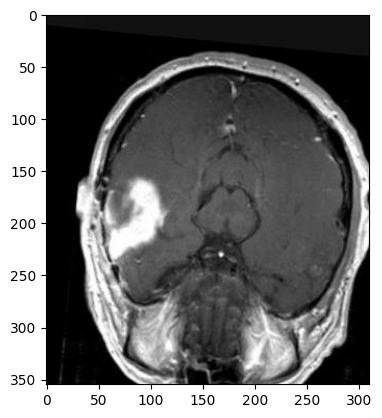

In [3]:
img= cv2.imread('Valid_tumor.jpg')
image2 = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

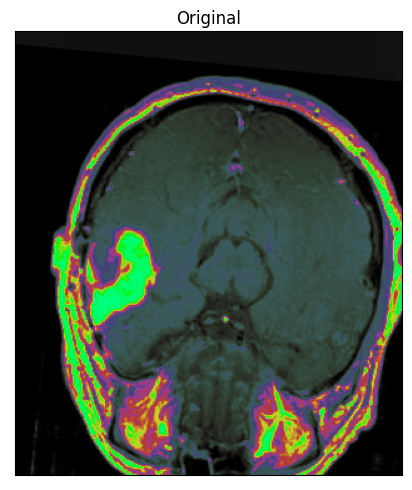

In [4]:
figure_size = 9

new_image = cv2.GaussianBlur(img, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
# plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

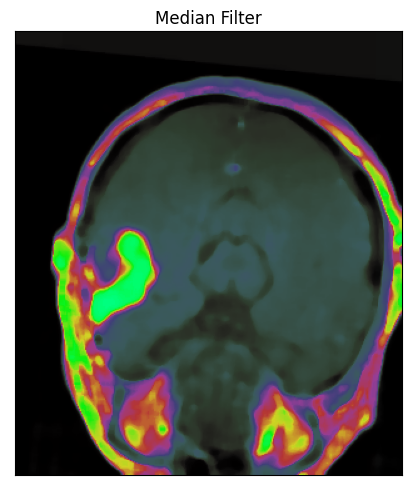

In [5]:
new_image = cv2.medianBlur(img, figure_size)
plt.figure(figsize=(11,6))
# plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

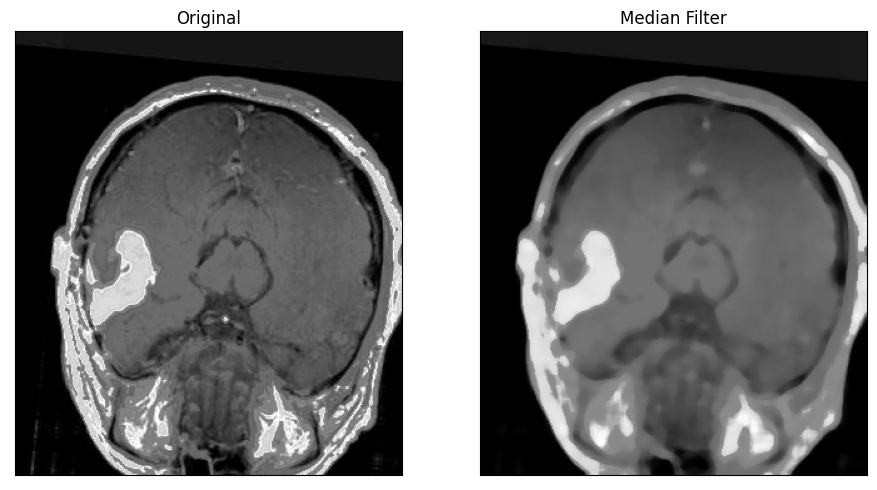

In [6]:
new_image = cv2.medianBlur(image2, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

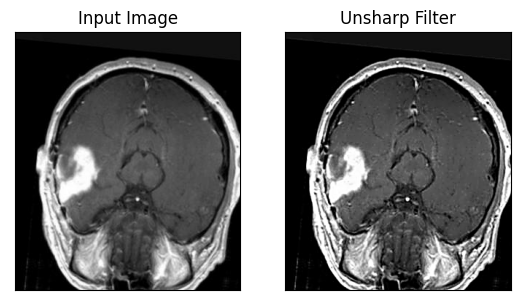

In [7]:
image = Image.fromarray(img.astype('uint8'))
new_image = image.filter(ImageFilter.UnsharpMask(radius=2, percent=150))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(new_image, cmap = 'gray')
plt.title('Unsharp Filter'), plt.xticks([]), plt.yticks([])
plt.show()

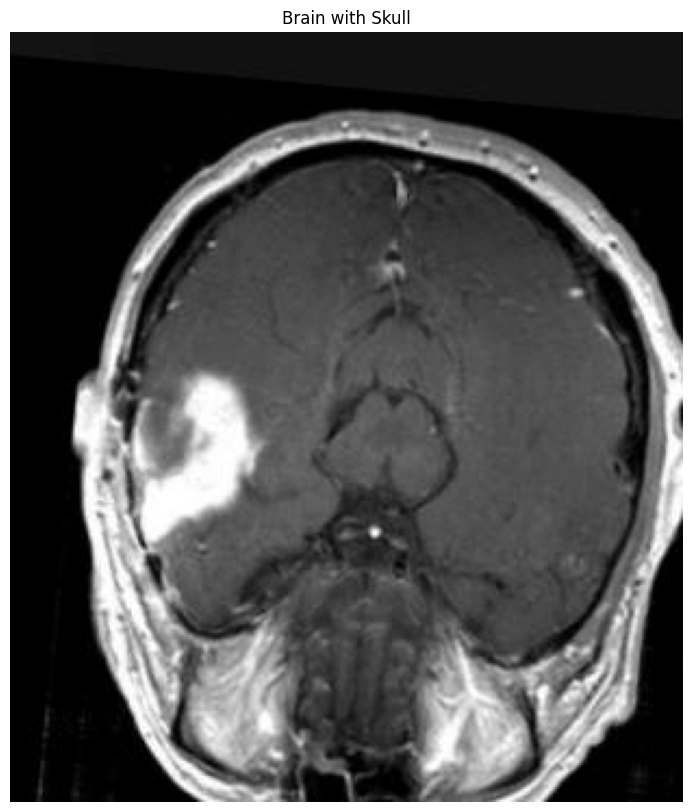

In [14]:
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain with Skull',gray,'gray')

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import extrema
import Watershed as skwater

def ShowImage(title,img,ctype):
  plt.figure(figsize=(10, 10))
  if ctype=='bgr':
    b,g,r = cv2.split(img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.axis('off')
  plt.title(title)
  plt.show()

In [3]:
pip install Watershed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 2.1 MB/s eta 0:00:0000:0100:01m
  Preparing metadata (setup.py) ... done
  Created wheel for Watershed: filename=Watershed-2.2.2-py3-none-any.whl size=57023 sha256=6c4d1db475559411ab623253642aa982194a6e850c64721005a041229182fd65
  Stored in directory: /Users/macbook/Library/Caches/pip/wheels/bf/d7/90/bcdf36d49e7ac0e09e61c1875578a7954d45819b9a134f2010
Successfully built Watershed
Note: you may need to restart the kernel to use updated packages.


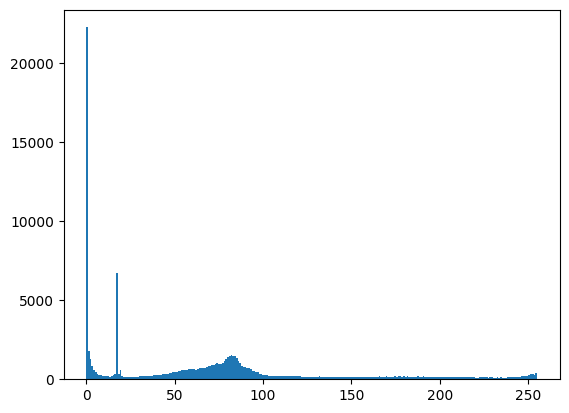

In [15]:
#Make a histogram of the intensities in the grayscale image
plt.hist(gray.ravel(),256)
plt.show()


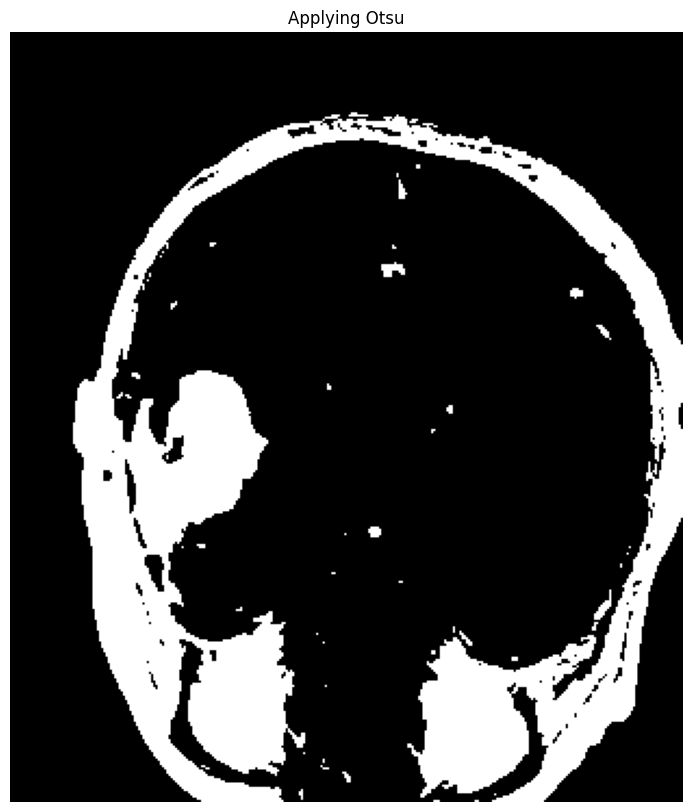

In [16]:
#Threshold the image to binary using Otsu's method
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
ShowImage('Applying Otsu',thresh,'gray')

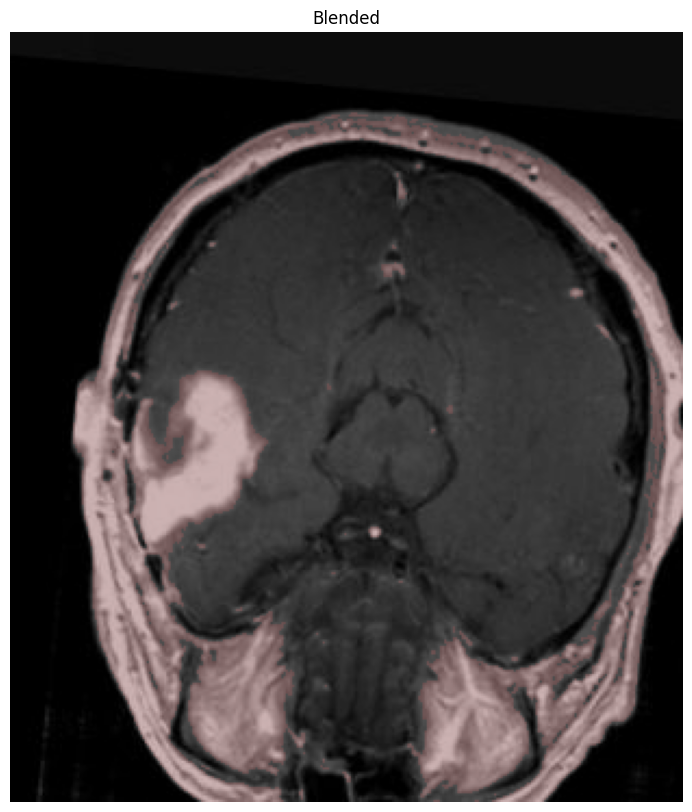

In [17]:
colormask = np.zeros(img.shape, dtype=np.uint8)
colormask[thresh!=0] = np.array((0,0,255))
blended = cv2.addWeighted(img,0.7,colormask,0.1,0)
ShowImage('Blended', blended, 'bgr')

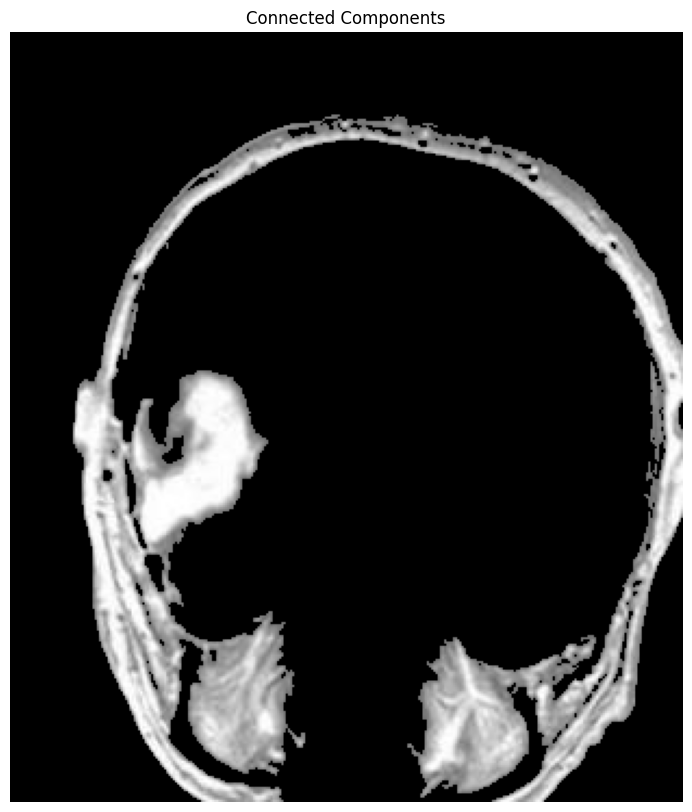

In [18]:
ret, markers = cv2.connectedComponents(thresh)

#Get the area taken by each component. Ignore label 0 since this is the background.
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
#Get label of largest component by area
largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above                        
#Get pixels which correspond to the brain
brain_mask = markers==largest_component

brain_out = img.copy()
#In a copy of the original image, clear those pixels that don't correspond to the brain
brain_out[brain_mask==False] = (0,0,0)
ShowImage('Connected Components',brain_out,'rgb')

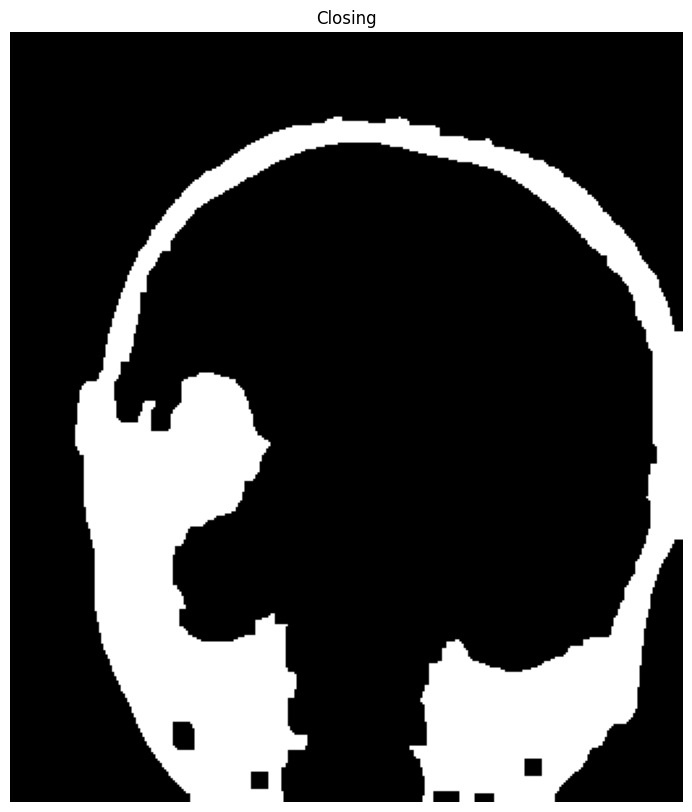

In [19]:
brain_mask = np.uint8(brain_mask)
kernel = np.ones((8,8),np.uint8)
closing = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)
ShowImage('Closing', closing, 'gray')

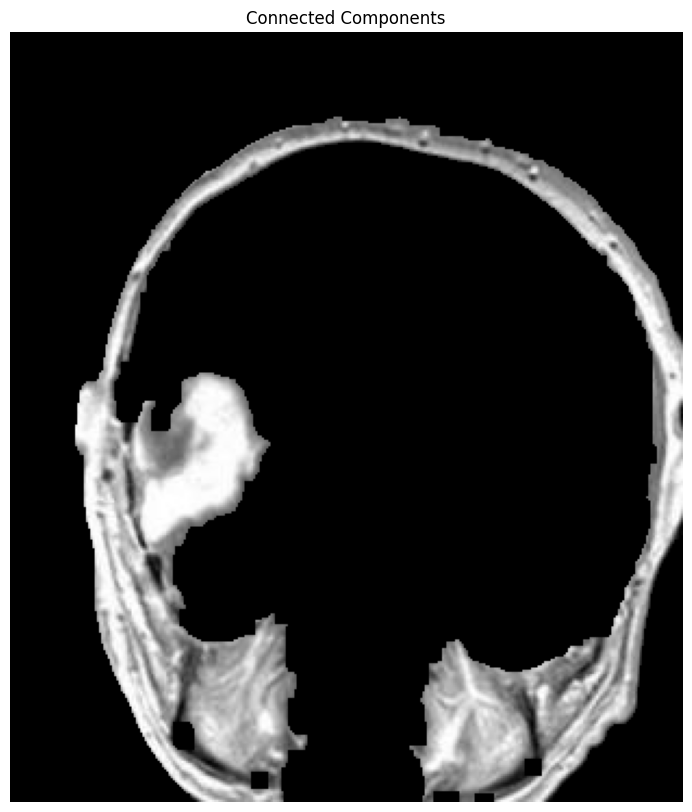

In [20]:
brain_out = img.copy()
#In a copy of the original image, clear those pixels that don't correspond to the brain
brain_out[closing==False] = (0,0,0)
ShowImage('Connected Components',brain_out,'rgb')